In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Cargar el archivo de Ámsterdam
amsterdam_df = pd.read_csv('listingsAmsterdam.csv.csv', encoding='latin-1')
# Cargar el archivo de Chicago
chicago_df = pd.read_csv('listingsChicago.csv.csv', encoding='latin-1')

In [ ]:
valores_nulos = amsterdam_df.isnull().sum().sum()
valores_nulos

66511

In [ ]:
valores_nuloss = chicago_df.isnull().sum().sum()
valores_nuloss

43946

In [ ]:
data1 = amsterdam_df.fillna(method = "ffill")
data2 = chicago_df.fillna(method = "ffill")

<ipython-input-7-4b675565bb4f>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1 = amsterdam_df.fillna(method = "ffill")
<ipython-input-7-4b675565bb4f>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data2 = chicago_df.fillna(method = "ffill")


In [ ]:
#crear nuevo dataframe con solo columnas cuantitativas
data1_cuantitativas = data1.select_dtypes(include=['float64', 'int64'])
data2_cuantitativas = data2.select_dtypes(include=['float64', 'int64'])

In [ ]:
#crear nuevo dataframe con solo columnas cualitativas
data1_cualitativas = data1.select_dtypes(include=['object'])
data2_cualitativas = data2.select_dtypes(include=['object'])

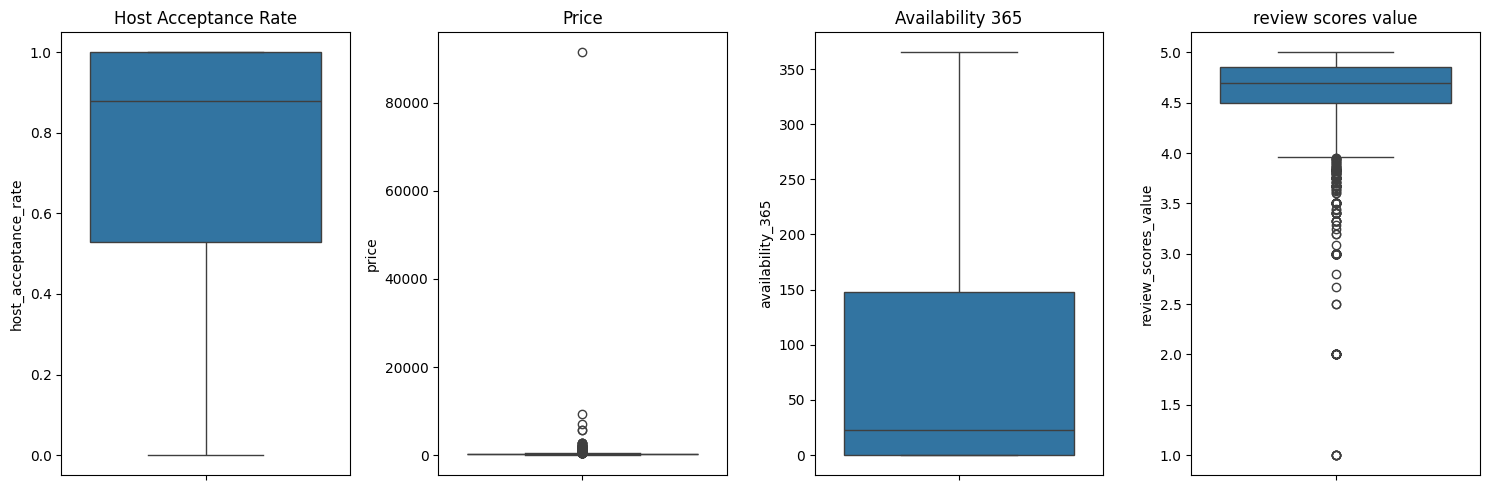

In [ ]:
# Crear dashboard de boxplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Boxplot para 'host_acceptance_rate'
sns.boxplot(y=data1_cuantitativas['host_acceptance_rate'], ax=axes[0])
axes[0].set_title('Host Acceptance Rate')

# Boxplot para 'price'
sns.boxplot(y=data1_cuantitativas['price'], ax=axes[1])
axes[1].set_title('Price')

# Boxplot para 'availability_365'
sns.boxplot(y=data1_cuantitativas['availability_365'], ax=axes[2])
axes[2].set_title('Availability 365')

# Boxplot para '	review_scores_value'
sns.boxplot(y=data1_cuantitativas['review_scores_value'], ax=axes[3])
axes[3].set_title('review scores value')

plt.tight_layout()
plt.show()

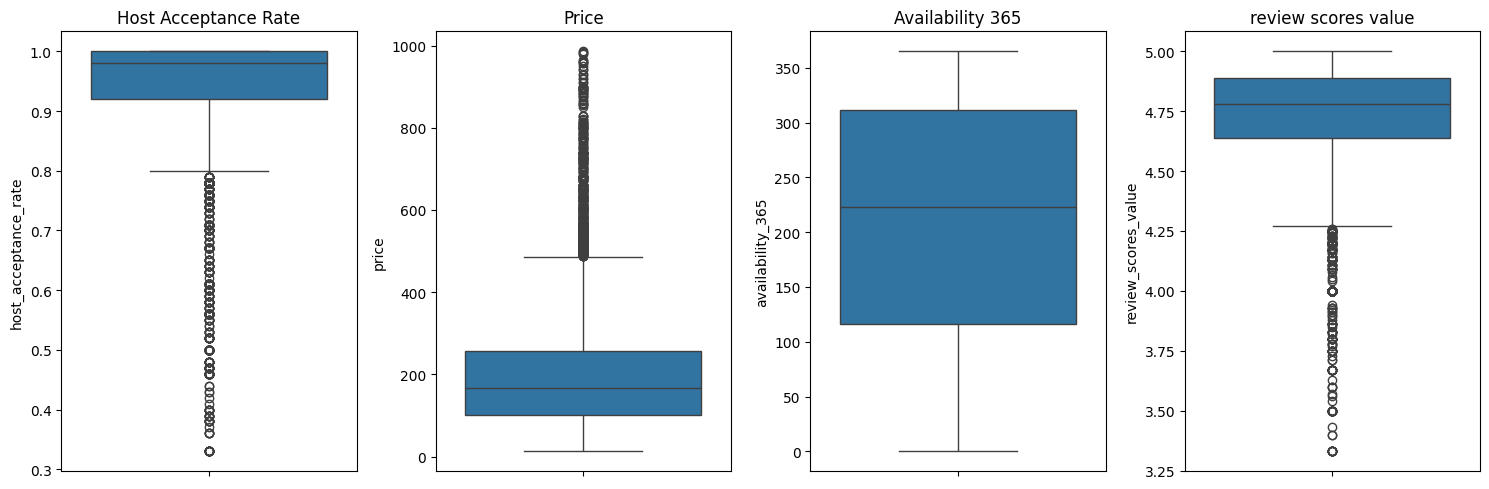

In [ ]:
# Crear dashboard de boxplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Boxplot para 'host_acceptance_rate'
sns.boxplot(y=data2_cuantis['host_acceptance_rate'], ax=axes[0])
axes[0].set_title('Host Acceptance Rate')

# Boxplot para 'price'
sns.boxplot(y=data2_cuantis['price'], ax=axes[1])
axes[1].set_title('Price')

# Boxplot para 'availability_365'
sns.boxplot(y=data2_cuantis['availability_365'], ax=axes[2])
axes[2].set_title('Availability 365')

# Boxplot para '	review_scores_value'
sns.boxplot(y=data2_cuantis['review_scores_value'], ax=axes[3])
axes[3].set_title('review scores value')

plt.tight_layout()
plt.show()

In [ ]:
data2_cuantitativas.head()

id     scrape_id    host_id  host_response_rate  \
0  1.675706e+07  2.024060e+13   32137398                1.00   
1  4.811204e+07  2.024060e+13   17251828                1.00   
2  1.089960e+18  2.024060e+13  487981983                1.00   
3  2.469418e+07  2.024060e+13   15721250                1.00   
4  6.399200e+17  2.024060e+13   37736852                0.89   

   host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                  1.00                  1.0                        1.0   
1                  0.90                  2.0                        5.0   
2                  0.99                  6.0                        6.0   
3                  1.00                  1.0                        1.0   
4                  0.70                  2.0                        3.0   

   neighbourhood_group_cleansed   latitude  longitude  ...  \
0                           NaN  41.846560  -87.68345  ...   
1                           NaN  41.894790  -87.69336  ...   
2                           NaN  41.870367  -87.68542  ...   
3                           NaN  41.967850  -87.69573  ...   
4                           NaN  41.916334  -87.63626  ...   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.83                   4.92   
1                       4.80                   4.70   
2                       5.00                   5.00   
3                       4.93                   4.98   
4                       4.33                   4.83   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.95                    4.65                 4.85   
1                         4.76                    4.77                 4.51   
2                         5.00                    5.00                 5.00   
3                         4.95                    4.88                 4.88   
4                         5.00                    5.00                 4.67   

   calculated_host_listings_count  \
0                             1.0   
1                             1.0   
2                             6.0   
3                             1.0   
4                             1.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.0   
1                                          1.0   
2                                          6.0   
3                                          1.0   
4                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                          0.0               2.41  
1                                          0.0               1.74  
2                                          0.0               0.31  
3                                          0.0               0.58  
4                                          0.0               0.46  

[5 rows x 43 columns]

<Figure size 1500x800 with 0 Axes>

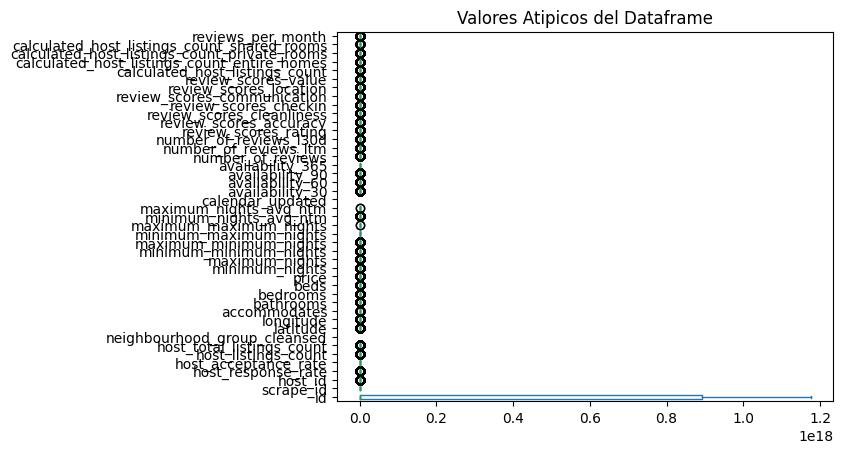

In [ ]:
#Outliers - amsterdam
fig = plt.figure(figsize = (15,8))
data1_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibujamos el diagrama

<Figure size 1500x800 with 0 Axes>

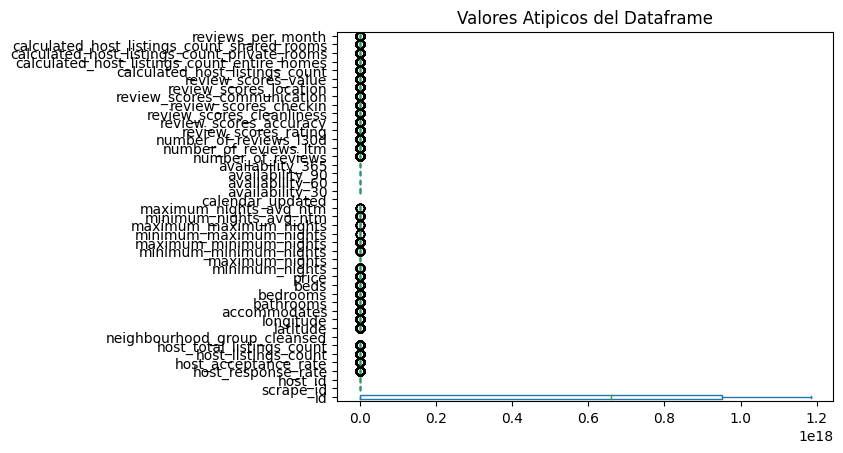

In [ ]:
#Outliers - chicago
fig = plt.figure(figsize = (15,8))
data2_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
y = data1_cuantitativas
limite_superior = y.mean() + 3*y.std()
limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", limite_superior)
print("Limite inferior permitido", limite_inferior)

y = data2_cuantitativas
limite_superior = y.mean() + 3*y.std()
limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", limite_superior)
print("Limite inferior permitido", limite_inferior)

Limite superior permitido id                                              1.793067e+18
scrape_id                                       2.024060e+13
host_id                                         5.879537e+08
host_response_rate                              1.458480e+00
host_acceptance_rate                            1.660171e+00
host_listings_count                             9.885468e+01
host_total_listings_count                       1.501162e+02
neighbourhood_group_cleansed                             NaN
latitude                                        5.241881e+01
longitude                                       4.996959e+00
accommodates                                    7.033283e+00
bathrooms                                       3.032154e+00
bedrooms                                        4.320208e+00
beds                                            6.527505e+00
price                                           3.201865e+03
minimum_nights                                  6.270322e+0

In [ ]:
data1_cuantis = data1_cuantitativas[(y<=limite_superior)&(y>=limite_inferior)]
data1_cuantis

data2_cuantis = data2_cuantitativas[(y<=limite_superior)&(y>=limite_inferior)]
data2_cuantis

id     scrape_id    host_id  host_response_rate  \
0     1.675706e+07  2.024060e+13   32137398                1.00   
1     4.811204e+07  2.024060e+13   17251828                1.00   
2     1.089960e+18  2.024060e+13  487981983                1.00   
3     2.469418e+07  2.024060e+13   15721250                1.00   
4     6.399200e+17  2.024060e+13   37736852                0.89   
...            ...           ...        ...                 ...   
7947  1.000700e+18  2.024060e+13   46149820                1.00   
7948  7.376000e+17  2.024060e+13   88547320                1.00   
7949  8.663180e+17  2.024060e+13  323890886                 NaN   
7950  5.119817e+07  2.024060e+13  247475779                1.00   
7951  6.789980e+17  2.024060e+13  356154157                0.93   

      host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                     1.00                  1.0                        1.0   
1                     0.90                  2.0                        5.0   
2                     0.99                  6.0                        6.0   
3                     1.00                  1.0                        1.0   
4                     0.70                  2.0                        3.0   
...                    ...                  ...                        ...   
7947                  0.99                  1.0                        1.0   
7948                  0.99                 11.0                       11.0   
7949                  0.99                  1.0                        1.0   
7950                  1.00                  1.0                        2.0   
7951                  0.92                  8.0                       10.0   

      neighbourhood_group_cleansed   latitude  longitude  ...  \
0                              NaN  41.846560 -87.683450  ...   
1                              NaN  41.894790 -87.693360  ...   
2                              NaN  41.870367 -87.685420  ...   
3                              NaN  41.967850 -87.695730  ...   
4                              NaN  41.916334 -87.636260  ...   
...                            ...        ...        ...  ...   
7947                           NaN  41.903879 -87.640697  ...   
7948                           NaN  41.891899 -87.656208  ...   
7949                           NaN  41.903524 -87.634706  ...   
7950                           NaN  41.841130 -87.617200  ...   
7951                           NaN  41.979640 -87.671170  ...   

      review_scores_cleanliness  review_scores_checkin  \
0                          4.83                   4.92   
1                          4.80                   4.70   
2                          5.00                   5.00   
3                          4.93                   4.98   
4                          4.33                   4.83   
...                         ...                    ...   
7947                       4.90                   5.00   
7948                       4.86                   4.96   
7949                       4.86                   4.96   
7950                       4.73                   4.90   
7951                       4.90                   4.90   

      review_scores_communication  review_scores_location  \
0                            4.95                    4.65   
1                            4.76                    4.77   
2                            5.00                    5.00   
3                            4.95                    4.88   
4                            5.00                    5.00   
...                           ...                     ...   
7947                         4.80                    5.00   
7948                         4.98                    4.83   
7949                         4.98                    4.83   
7950                         4.98                    4.54   
7951                         4.97                    4.94   

      review_scores_value  calculated_host_listings_count  \
0 

In [ ]:
data1_cuantis = data1_cuantis.fillna(round(data1_cuantis.mean(),1))
data1_cuantis

data2_cuantis = data2_cuantis.fillna(round(data2_cuantis.mean(),1))
data2_cuantis

id     scrape_id    host_id  host_response_rate  \
0     1.675706e+07  2.024060e+13   32137398                1.00   
1     4.811204e+07  2.024060e+13   17251828                1.00   
2     1.089960e+18  2.024060e+13  487981983                1.00   
3     2.469418e+07  2.024060e+13   15721250                1.00   
4     6.399200e+17  2.024060e+13   37736852                0.89   
...            ...           ...        ...                 ...   
7947  1.000700e+18  2.024060e+13   46149820                1.00   
7948  7.376000e+17  2.024060e+13   88547320                1.00   
7949  8.663180e+17  2.024060e+13  323890886                1.00   
7950  5.119817e+07  2.024060e+13  247475779                1.00   
7951  6.789980e+17  2.024060e+13  356154157                0.93   

      host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                     1.00                  1.0                        1.0   
1                     0.90                  2.0                        5.0   
2                     0.99                  6.0                        6.0   
3                     1.00                  1.0                        1.0   
4                     0.70                  2.0                        3.0   
...                    ...                  ...                        ...   
7947                  0.99                  1.0                        1.0   
7948                  0.99                 11.0                       11.0   
7949                  0.99                  1.0                        1.0   
7950                  1.00                  1.0                        2.0   
7951                  0.92                  8.0                       10.0   

      neighbourhood_group_cleansed   latitude  longitude  ...  \
0                              NaN  41.846560 -87.683450  ...   
1                              NaN  41.894790 -87.693360  ...   
2                              NaN  41.870367 -87.685420  ...   
3                              NaN  41.967850 -87.695730  ...   
4                              NaN  41.916334 -87.636260  ...   
...                            ...        ...        ...  ...   
7947                           NaN  41.903879 -87.640697  ...   
7948                           NaN  41.891899 -87.656208  ...   
7949                           NaN  41.903524 -87.634706  ...   
7950                           NaN  41.841130 -87.617200  ...   
7951                           NaN  41.979640 -87.671170  ...   

      review_scores_cleanliness  review_scores_checkin  \
0                          4.83                   4.92   
1                          4.80                   4.70   
2                          5.00                   5.00   
3                          4.93                   4.98   
4                          4.33                   4.83   
...                         ...                    ...   
7947                       4.90                   5.00   
7948                       4.86                   4.96   
7949                       4.86                   4.96   
7950                       4.73                   4.90   
7951                       4.90                   4.90   

      review_scores_communication  review_scores_location  \
0                            4.95                    4.65   
1                            4.76                    4.77   
2                            5.00                    5.00   
3                            4.95                    4.88   
4                            5.00                    5.00   
...                           ...                     ...   
7947                         4.80                    5.00   
7948                         4.98                    4.83   
7949                         4.98                    4.83   
7950                         4.98                    4.54   
7951                         4.97                    4.94   

      review_scores_value  calculated_host_listings_count  \
0 

<Figure size 1500x800 with 0 Axes>

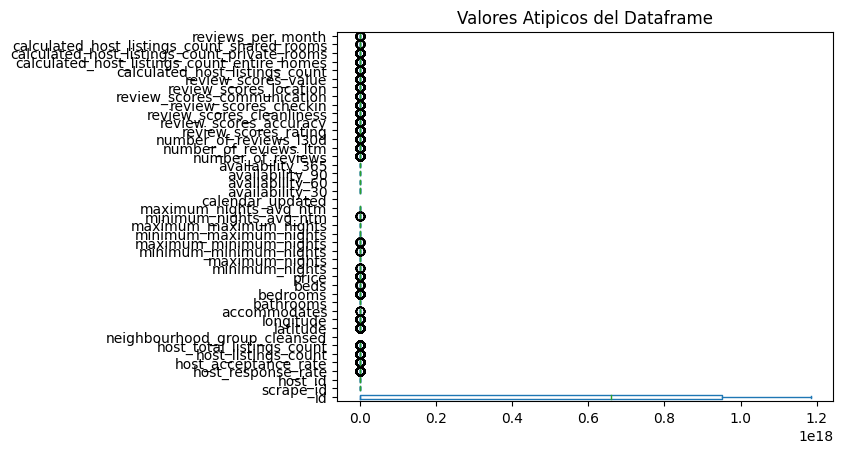

In [ ]:
#Outliers - chicago
fig = plt.figure(figsize = (15,8))
data2_cuantis.plot(kind = 'box', vert = False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibujamos el diagrama

<Figure size 1500x800 with 0 Axes>

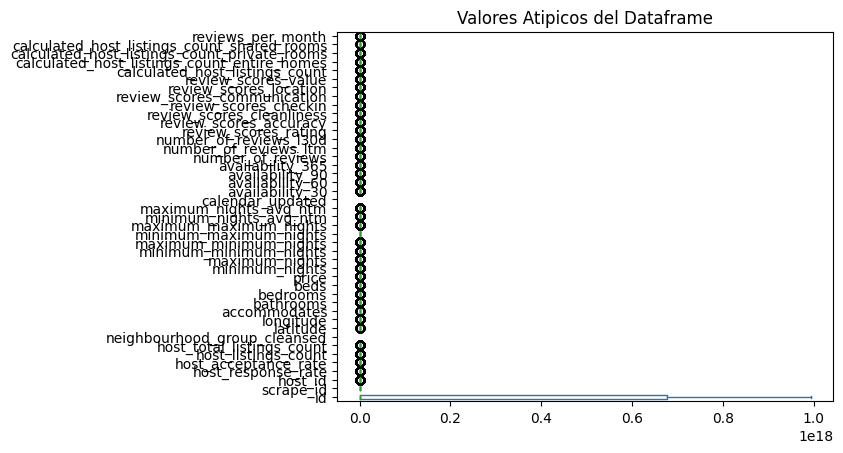

In [ ]:
#Outliers - amsterdam
fig = plt.figure(figsize = (15,8))
data1_cuantis.plot(kind = 'box', vert = False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
data1_cualis = data1_cualitativas.fillna(method = "ffill")
data2_cualis = data2_cualitativas.fillna(method = "ffill")

<ipython-input-22-31f6afa460fc>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1_cualis = data1_cualitativas.fillna(method = "ffill")
<ipython-input-22-31f6afa460fc>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data2_cualis = data2_cualitativas.fillna(method = "ffill")


In [ ]:
#juntar datos cualitativos y cuantitativos para ambas bases de datos
data1_limpio = pd.concat([data1_cuantis, data1_cualis], axis=1)
data2_limpio = pd.concat([data2_cuantis, data2_cualis], axis=1)

In [ ]:
#eliminar columnas sin registros
data1_limpio = data1_limpio.drop(['calendar_updated', 'neighbourhood_group_cleansed'], axis = 1, errors='ignore')
data2_limpio = data2_limpio.drop(['neighbourhood_group_cleansed', 'calendar_updated'], axis = 1, errors='ignore')

In [ ]:
data1_limpio.isnull().sum().sum()

4

In [ ]:
data2_limpio.isnull().sum().sum()

1

In [ ]:
#Guardar archivos
data1_limpio.to_csv('data1_limpio - Amsterdam.csv')
data2_limpio.to_csv('data2_limpio - Chicago.csv')

***GRAFICOS***

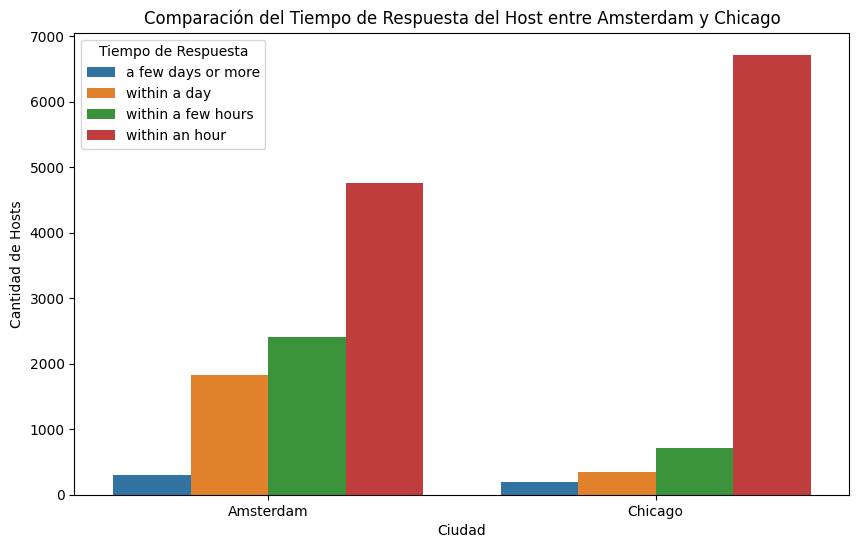

In [ ]:
#Comparación de ambas ciudades sobre el tiempo de respuesta por parte del host (host_response_time)
# Crear un nuevo DataFrame con los datos de ambas ciudades
combined_df = pd.DataFrame({
    'Ciudad': ['Amsterdam'] * len(data1_limpio) + ['Chicago'] * len(data2_limpio),
    'Tiempo de Respuesta': pd.concat([data1_limpio['host_response_time'], data2_limpio['host_response_time']])
})

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='Ciudad', hue='Tiempo de Respuesta', data=combined_df)
plt.title('Comparación del Tiempo de Respuesta del Host entre Amsterdam y Chicago')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Hosts')
plt.show()

<ipython-input-28-5ae2b1512c40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_host_amsterdam['host_is_superhost'] = df_host_amsterdam['host_is_superhost'].map({'f': 0, 't': 1})
<ipython-input-28-5ae2b1512c40>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_host_chicago['host_is_superhost'] = df_host_chicago['host_is_superhost'].map({'f': 0, 't': 1})


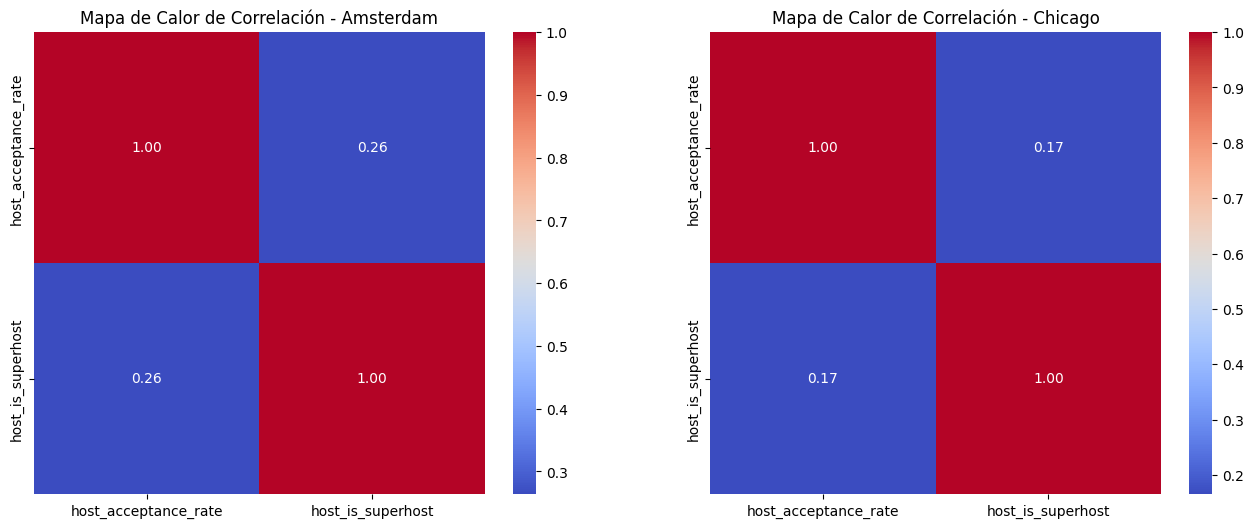

In [ ]:
# Crear un nuevo DataFrame con las columnas relevantes para Amsterdam
df_host_amsterdam = data1_limpio[['host_acceptance_rate', 'host_is_superhost']]

# Convertir la columna 'host_is_superhost' a numérica (0 para False, 1 para True)
df_host_amsterdam['host_is_superhost'] = df_host_amsterdam['host_is_superhost'].map({'f': 0, 't': 1})

# Calcular la correlación entre las variables para Amsterdam
corr_matrix_amsterdam = df_host_amsterdam.corr()

# Crear un nuevo DataFrame con las columnas relevantes para Chicago
df_host_chicago = data2_limpio[['host_acceptance_rate', 'host_is_superhost']]

# Convertir la columna 'host_is_superhost' a numérica (0 para False, 1 para True)
df_host_chicago['host_is_superhost'] = df_host_chicago['host_is_superhost'].map({'f': 0, 't': 1})

# Calcular la correlación entre las variables para Chicago
corr_matrix_chicago = df_host_chicago.corr()

# Mostrar los mapas de calor de la correlación en una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mapa de calor para Amsterdam
sns.heatmap(corr_matrix_amsterdam, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title('Mapa de Calor de Correlación - Amsterdam')

# Mapa de calor para Chicago
sns.heatmap(corr_matrix_chicago, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title('Mapa de Calor de Correlación - Chicago')

plt.show()

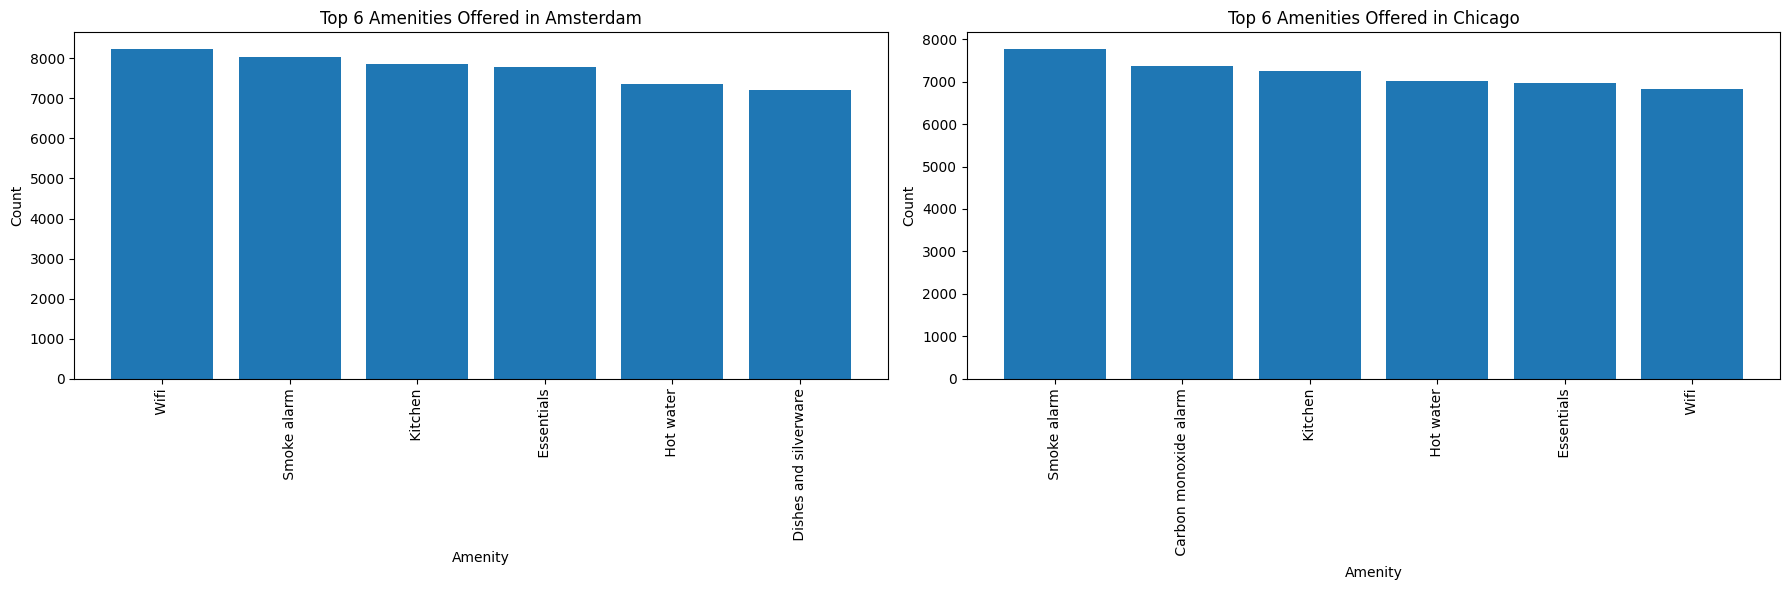

In [ ]:
from collections import Counter
# Amsterdam amenities
amsterdam_amenities = data1_limpio['amenities'].tolist()

amenities_list_amsterdam = []
for amenity_str in amsterdam_amenities:
  amenities = amenity_str.replace('[', '').replace(']', '').replace('"', '').split(',')
  amenities_list_amsterdam.extend(amenities)

amenity_counts_amsterdam = Counter(amenities_list_amsterdam)
top_amenities_amsterdam = amenity_counts_amsterdam.most_common(6)

# Chicago amenities
chicago_amenities = data2_limpio['amenities'].tolist()

amenities_list_chicago = []
for amenity_str in chicago_amenities:
  amenities = amenity_str.replace('[', '').replace(']', '').replace('"', '').split(',')
  amenities_list_chicago.extend(amenities)

amenity_counts_chicago = Counter(amenities_list_chicago)
top_amenities_chicago = amenity_counts_chicago.most_common(6)

# Create bar plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Amsterdam plot
amenities_amsterdam, counts_amsterdam = zip(*top_amenities_amsterdam)
axes[0].bar(amenities_amsterdam, counts_amsterdam)
axes[0].set_xticks(range(len(amenities_amsterdam)))
axes[0].set_xticklabels(amenities_amsterdam, rotation=90)
axes[0].set_title('Top 6 Amenities Offered in Amsterdam')
axes[0].set_xlabel('Amenity')
axes[0].set_ylabel('Count')

# Chicago plot
amenities_chicago, counts_chicago = zip(*top_amenities_chicago)
axes[1].bar(amenities_chicago, counts_chicago)
axes[1].set_xticks(range(len(amenities_chicago)))
axes[1].set_xticklabels(amenities_chicago, rotation=90)
axes[1].set_title('Top 6 Amenities Offered in Chicago')
axes[1].set_xlabel('Amenity')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

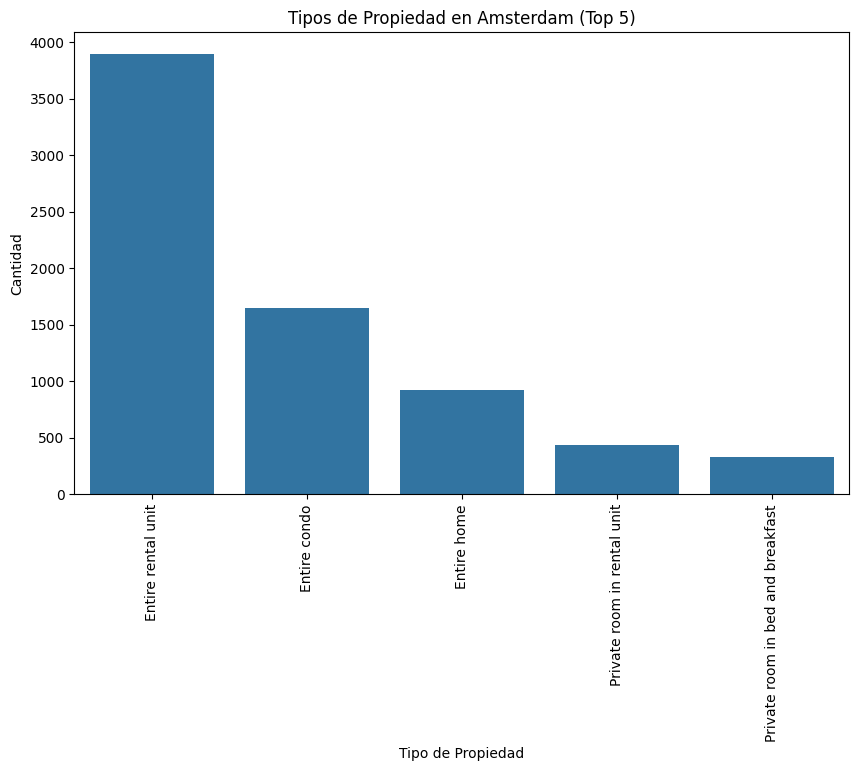

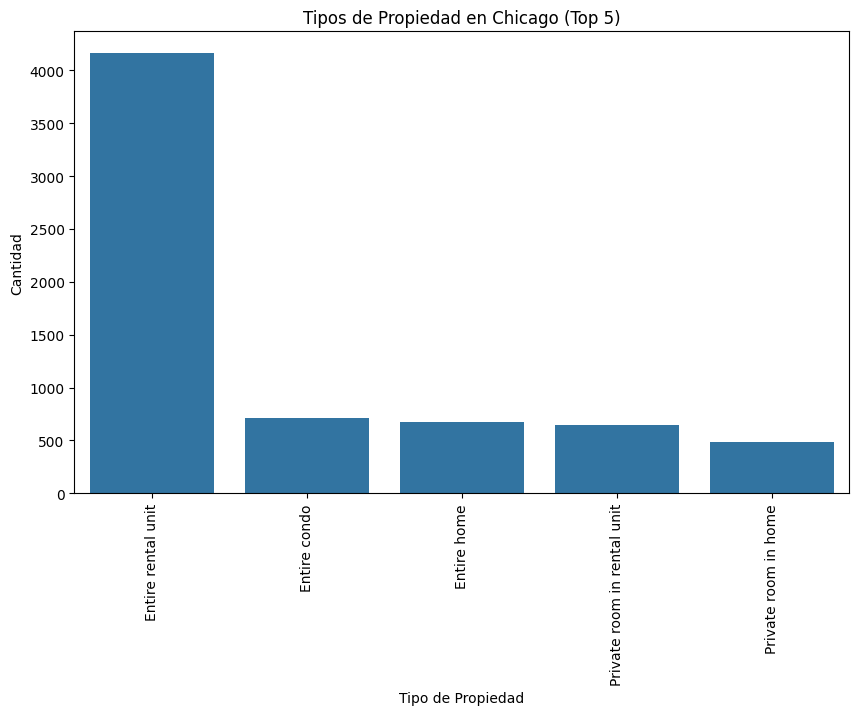

In [ ]:
# Gráfico para Amsterdam
plt.figure(figsize=(10, 6))
sns.countplot(x='property_type', data=data1_limpio, order=data1_limpio['property_type'].value_counts().iloc[:5].index)
plt.title('Tipos de Propiedad en Amsterdam (Top 5)')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

# Gráfico para Chicago
plt.figure(figsize=(10, 6))
sns.countplot(x='property_type', data=data2_limpio, order=data2_limpio['property_type'].value_counts().iloc[:5].index)
plt.title('Tipos de Propiedad en Chicago (Top 5)')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

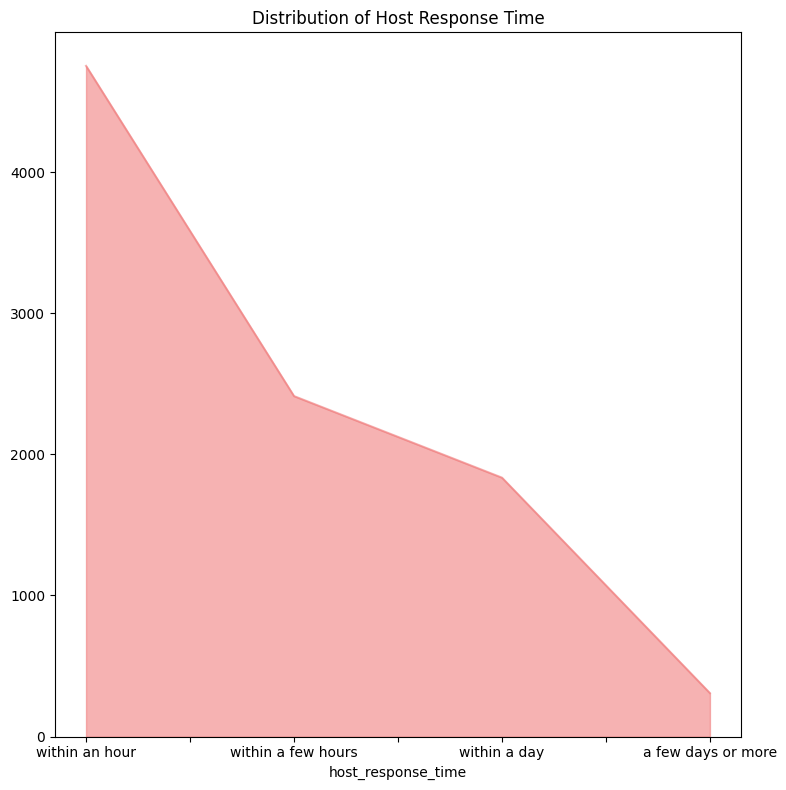

In [ ]:
host_response_time_counts = data1['host_response_time'].value_counts()

# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))
host_response_time_counts.plot(kind='area', color='lightcoral', alpha=0.6)
plt.title('Distribution of Host Response Time')
plt.ylabel('')  # Para que no aparezca la etiqueta del eje y
plt.tight_layout()
plt.show()

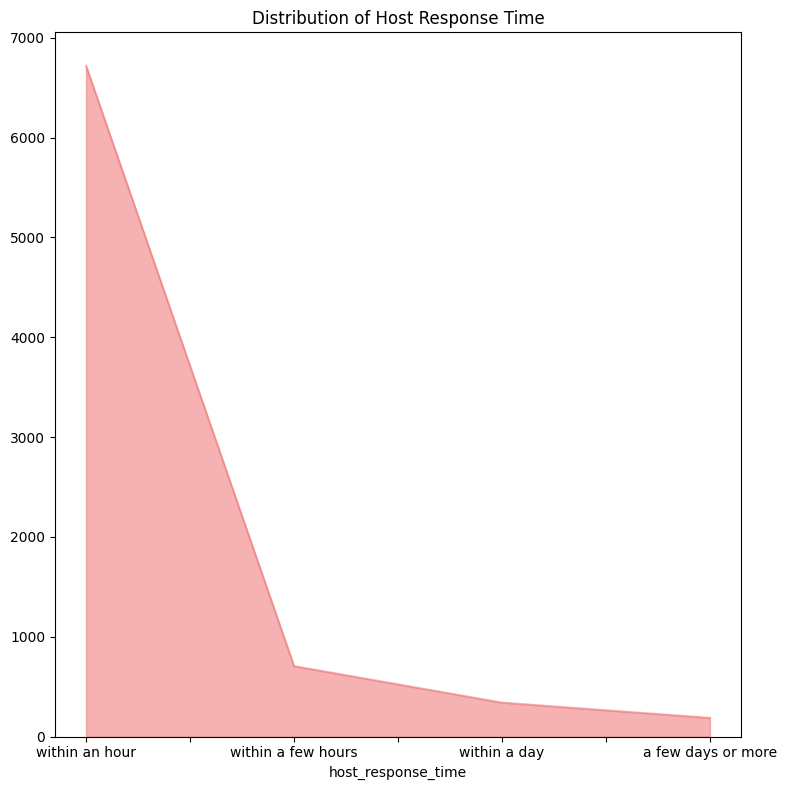

In [ ]:
host_response_time_counts = data2['host_response_time'].value_counts()

# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))
host_response_time_counts.plot(kind='area', color='lightcoral', alpha=0.6)
plt.title('Distribution of Host Response Time')
plt.ylabel('')  # Para que no aparezca la etiqueta del eje y
plt.tight_layout()
plt.show()

***MAPA DE CALOR*** 🔥

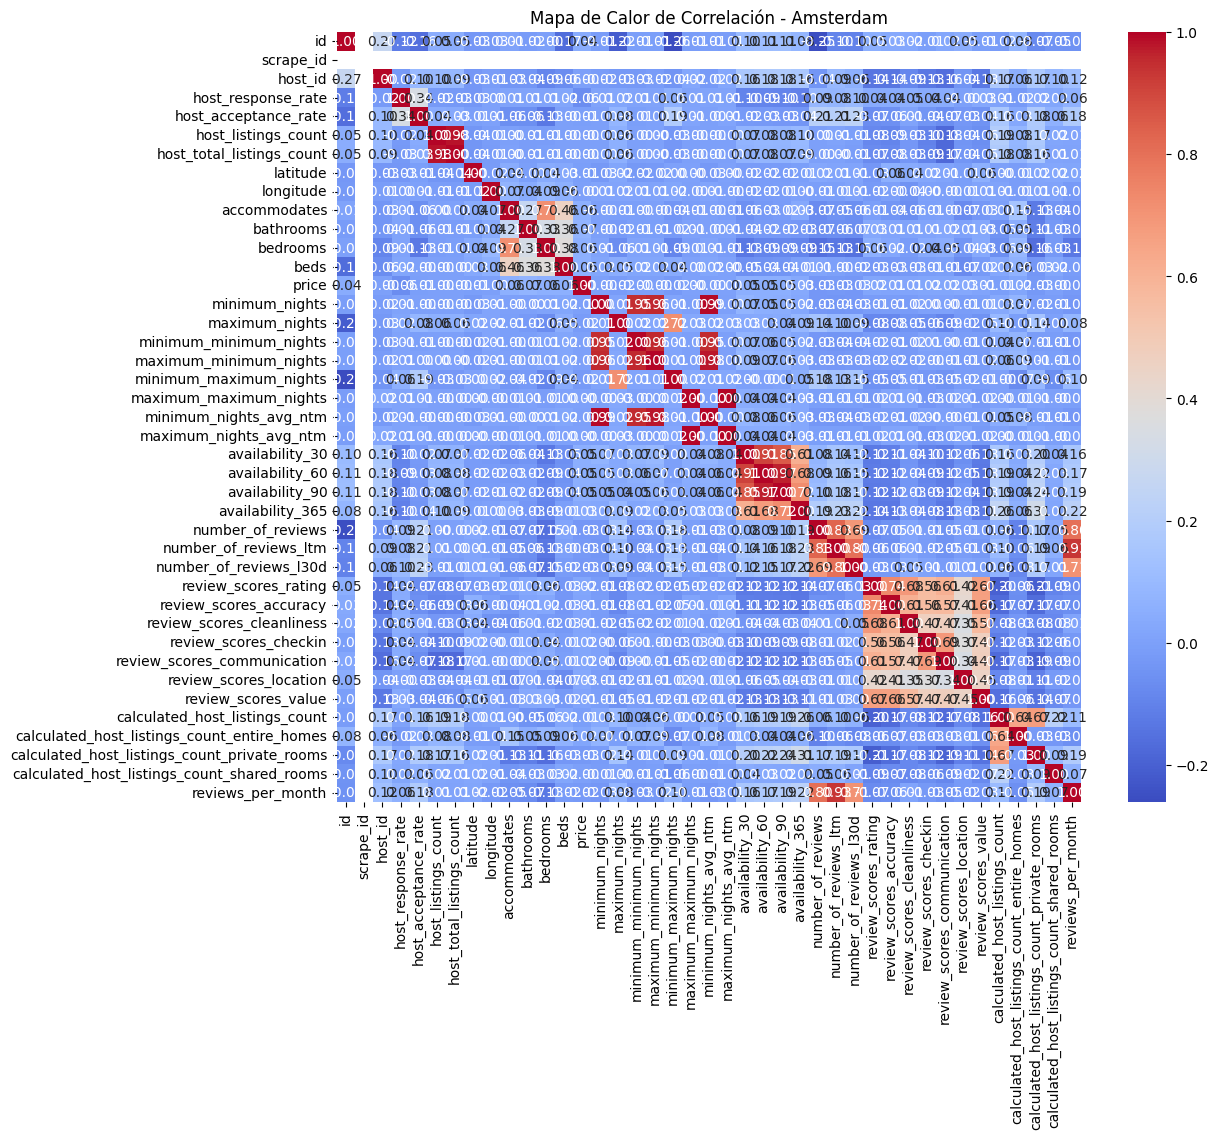

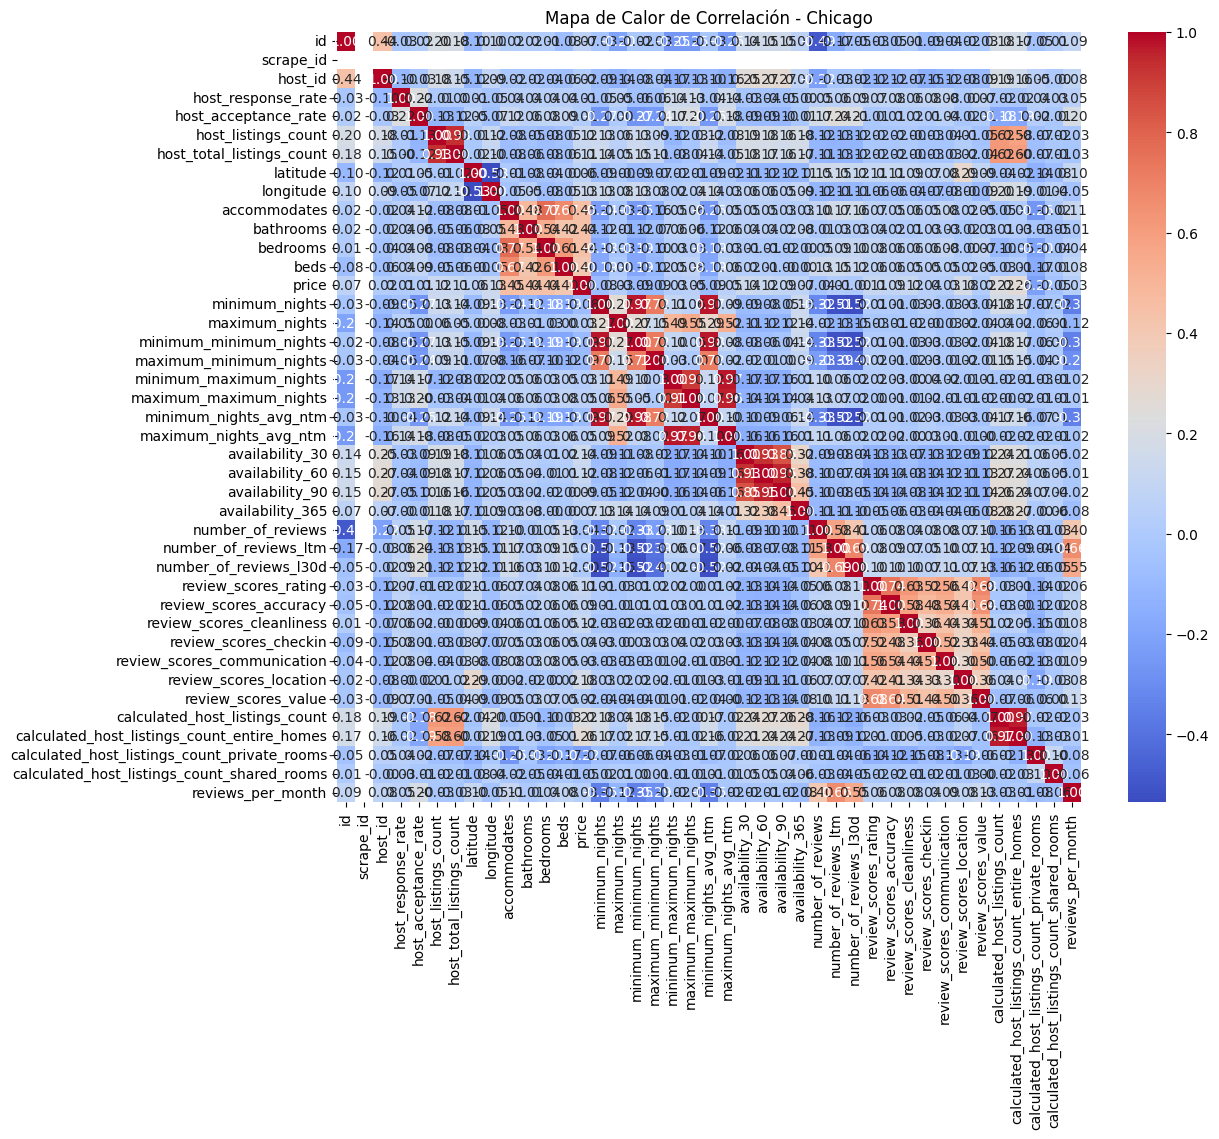

In [ ]:
# Amsterdam
#columnas numéricas del DataFrame
df_numeric = data1_limpio.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

#mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación - Amsterdam')
plt.show()

# Chicago
#columnas numéricas
df_numeric = data2_limpio.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

#mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación - Chicago')
plt.show()

***PRINCIPALES CORRELACIONES*** ☝



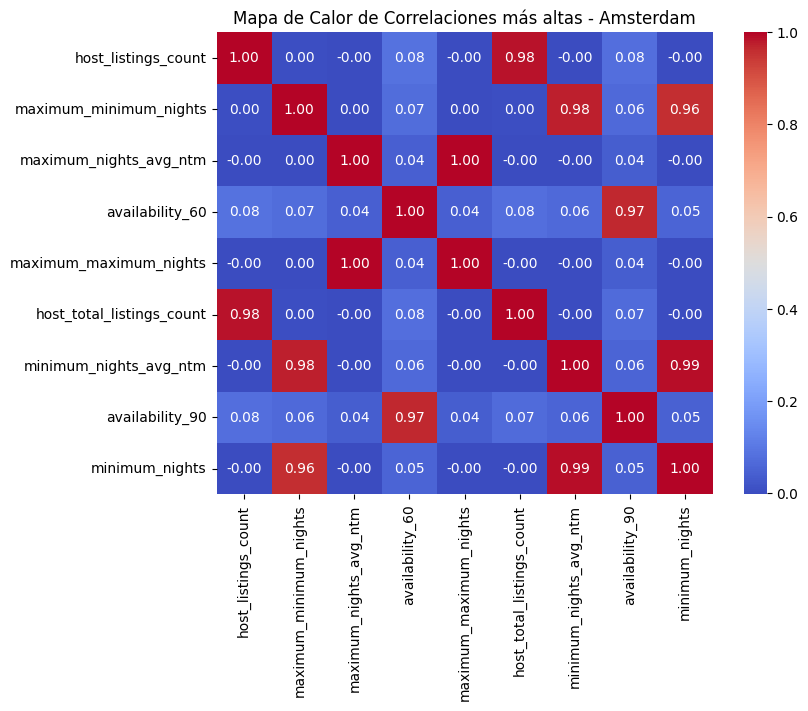

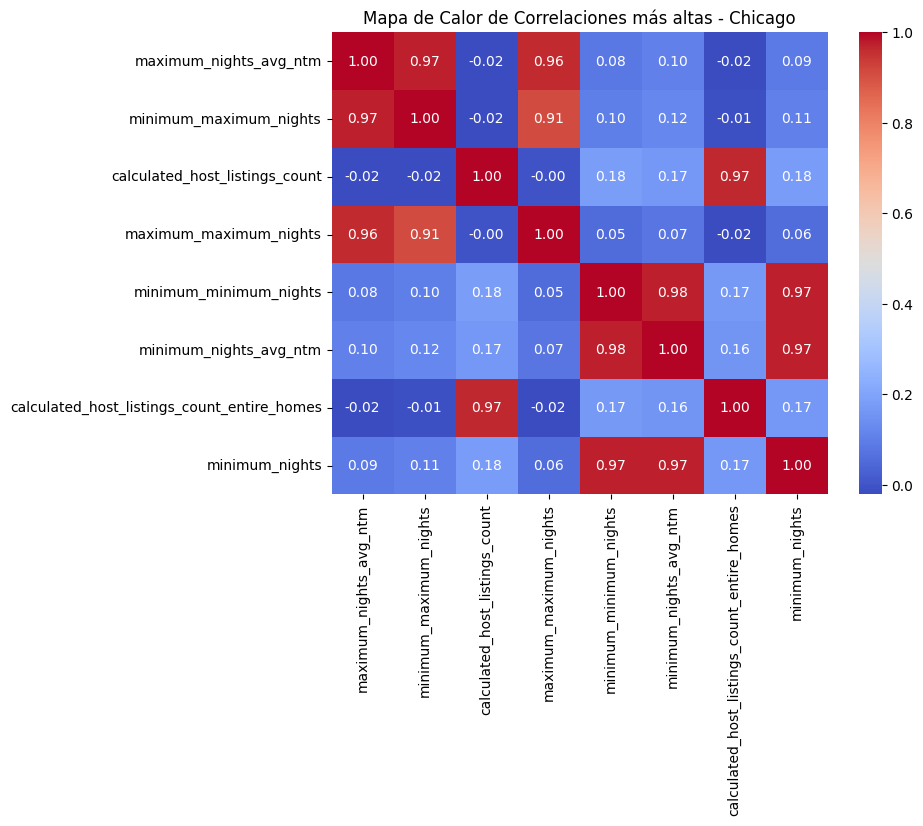

In [ ]:
# Amsterdam
df_numeric = data1_limpio.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
high_corr = sorted_pairs[abs(sorted_pairs) > 0.5]
high_corr = high_corr[high_corr != 1]
high_corr = high_corr.drop_duplicates(keep='first')

# Obtener las variables con mayor correlación
variables = set()
for pair in high_corr.head(6).index:
  variables.update(pair)

# Crear una submatriz de correlación
sub_corr_matrix = corr_matrix.loc[list(variables), list(variables)]

# Mapa de calor para Amsterdam
plt.figure(figsize=(8, 6))
sns.heatmap(sub_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones más altas - Amsterdam')
plt.show()

# Chicago
df_numeric = data2_limpio.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
high_corr = sorted_pairs[abs(sorted_pairs) > 0.5]
high_corr = high_corr[high_corr != 1]
high_corr = high_corr.drop_duplicates(keep='first')

# Obtener las variables con mayor correlación
variables = set()
for pair in high_corr.head(6).index:
  variables.update(pair)

# Crear una submatriz de correlación
sub_corr_matrix = corr_matrix.loc[list(variables), list(variables)]

# Mapa de calor para Chicago
plt.figure(figsize=(8, 6))
sns.heatmap(sub_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones más altas - Chicago')
plt.show()

In [ ]:
# Amsterdam
df_numeric = data1_limpio.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
high_corr = sorted_pairs[abs(sorted_pairs) > 0.5]
high_corr = high_corr[high_corr != 1]
high_corr = high_corr.drop_duplicates(keep='first')

print(f"Correlaciones más altas para Amsterdam:\n{high_corr.head(6)}")

# Chicago
df_numeric = data2_limpio.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
high_corr = sorted_pairs[abs(sorted_pairs) > 0.5]
high_corr = high_corr[high_corr != 1]
high_corr = high_corr.drop_duplicates(keep='first')

print(f"\nCorrelaciones más altas para Chicago:\n{high_corr.head(6)}")

Correlaciones más altas para Amsterdam:
maximum_maximum_nights  maximum_nights_avg_ntm       1.000000
minimum_nights_avg_ntm  minimum_nights               0.990217
host_listings_count     host_total_listings_count    0.984839
minimum_nights_avg_ntm  maximum_minimum_nights       0.975424
availability_60         availability_90              0.968158
minimum_nights          maximum_minimum_nights       0.958905
dtype: float64

Correlaciones más altas para Chicago:
minimum_nights_avg_ntm          minimum_minimum_nights                         0.975574
minimum_nights                  minimum_minimum_nights                         0.974889
maximum_nights_avg_ntm          minimum_maximum_nights                         0.973785
minimum_nights                  minimum_nights_avg_ntm                         0.972430
calculated_host_listings_count  calculated_host_listings_count_entire_homes    0.967846
maximum_maximum_nights          maximum_nights_avg_ntm                         0.961243
dtype:

Amsterdam - Top 3 modelos de regresión lineal simple:


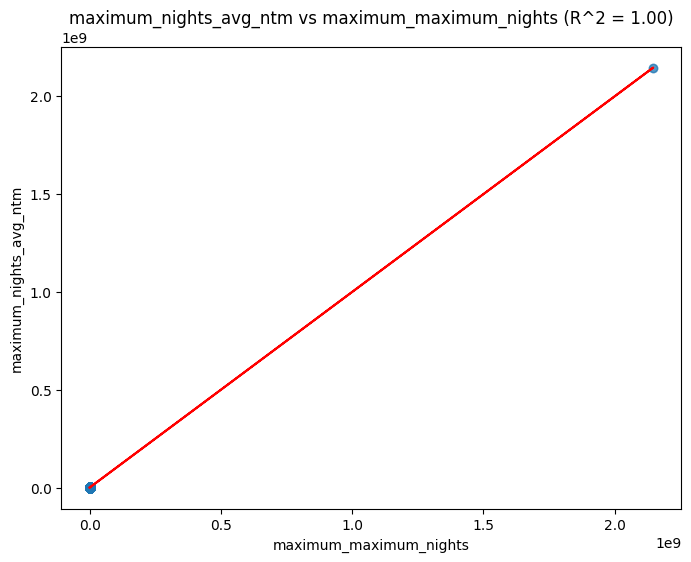

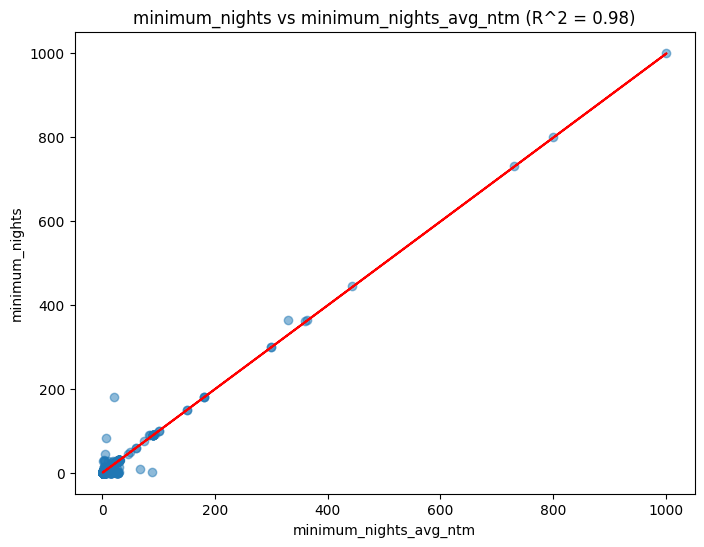

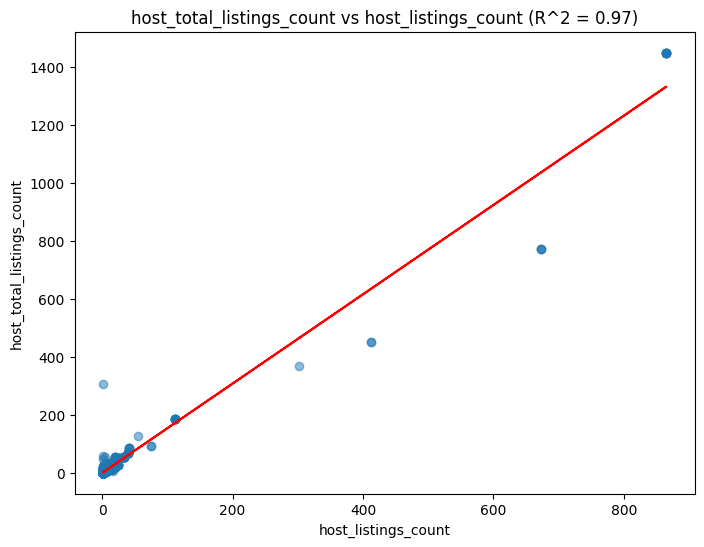


Chicago - Top 3 modelos de regresión lineal simple:


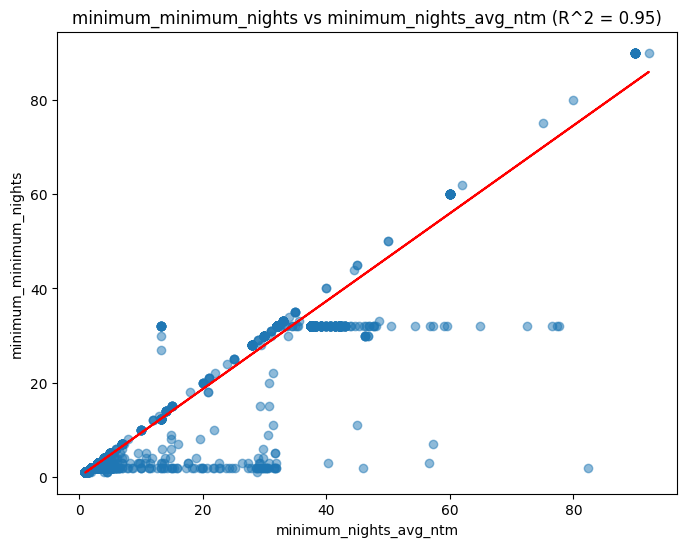

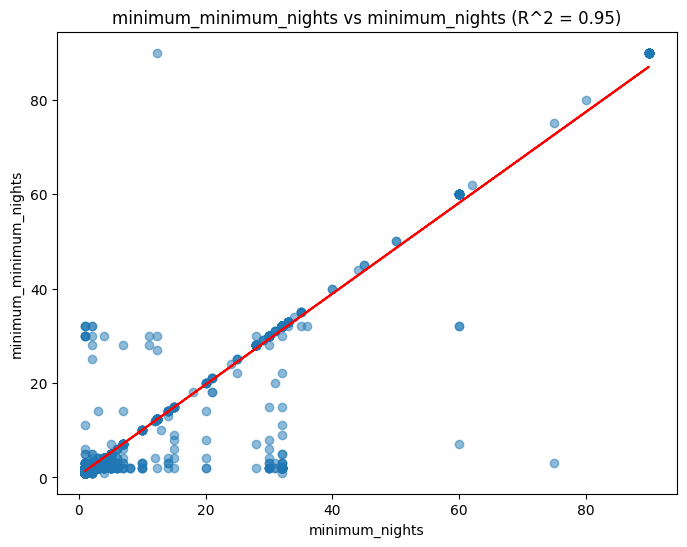

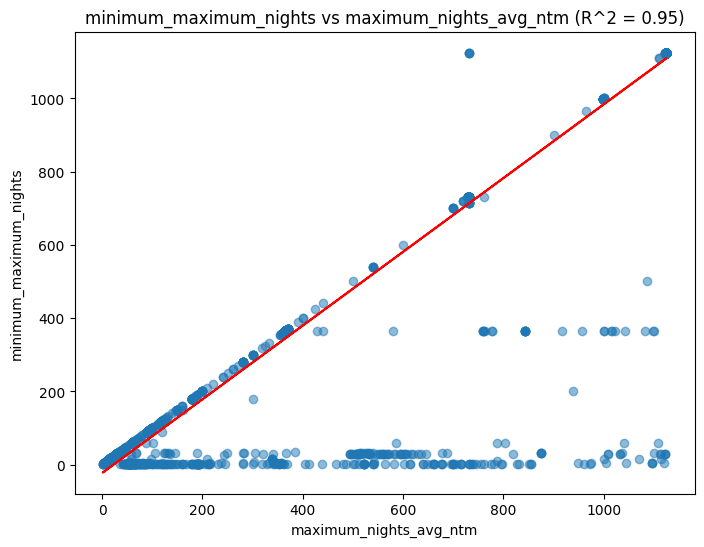

In [ ]:
# Amsterdam
df_numeric = data1_limpio.select_dtypes(include=['number'])

# Calcula la matriz de correlación
corr_matrix = df_numeric.corr()

# Encuentra las 3 correlaciones más altas (excluyendo la diagonal)
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
high_corr = sorted_pairs[abs(sorted_pairs) > 0]
high_corr = high_corr[high_corr != 1]
high_corr = high_corr.drop_duplicates(keep='first')
top_3_corr = high_corr.head(3)

# Modelos de regresión y gráficos
print("Amsterdam - Top 3 modelos de regresión lineal simple:")
for pair in top_3_corr.index:
  var1, var2 = pair
  X = df_numeric[var1].values.reshape(-1, 1)
  y = df_numeric[var2].values
  model = LinearRegression()
  model.fit(X, y)
  r2 = r2_score(y, model.predict(X))

  # Gráfico
  plt.figure(figsize=(8, 6))
  plt.scatter(X, y, alpha=0.5)
  plt.plot(X, model.predict(X), color='red')
  plt.title(f"{var2} vs {var1} (R^2 = {r2:.2f})")
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.show()

# Chicago
df_numeric = data2_limpio.select_dtypes(include=['number'])

# Calcula la matriz de correlación
corr_matrix = df_numeric.corr()

#3 correlaciones más altas
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
high_corr = sorted_pairs[abs(sorted_pairs) > 0]
high_corr = high_corr[high_corr != 1]
high_corr = high_corr.drop_duplicates(keep='first')
top_3_corr = high_corr.head(3)

# Modelos de regresión y gráficos
print("\nChicago - Top 3 modelos de regresión lineal simple:")
for pair in top_3_corr.index:
  var1, var2 = pair
  X = df_numeric[var1].values.reshape(-1, 1)
  y = df_numeric[var2].values
  model = LinearRegression()
  model.fit(X, y)
  r2 = r2_score(y, model.predict(X))

  # Gráfico
  plt.figure(figsize=(8, 6))
  plt.scatter(X, y, alpha=0.5)
  plt.plot(X, model.predict(X), color='red')
  plt.title(f"{var2} vs {var1} (R^2 = {r2:.2f})")
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.show()

In [ ]:
# Amsterdam
df_numeric = data1_limpio.select_dtypes(include=['number'])

# Calcula la matriz de correlación
corr_matrix = df_numeric.corr()

# Encuentra las 3 correlaciones más altas (excluyendo la diagonal)
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
high_corr = sorted_pairs[abs(sorted_pairs) > 0]  # Considera todas las correlaciones
high_corr = high_corr[high_corr != 1]
high_corr = high_corr.drop_duplicates(keep='first')
top_3_corr = high_corr.head(3)

# Modelos de regresión y coeficientes de correlación
print("Amsterdam - Top 3 modelos de regresión lineal simple:")
for pair in top_3_corr.index:
  var1, var2 = pair
  X = df_numeric[var1].values.reshape(-1, 1)
  y = df_numeric[var2].values
  model = LinearRegression()
  model.fit(X, y)
  r2 = r2_score(y, model.predict(X))
  print(f"\nModelo: {var2} ~ {var1}")
  print(f"Coeficiente de correlación: {top_3_corr[pair]:.2f}")
  print(f"Coeficiente de determinación (R^2): {r2:.2f}")
  print(f"Intersección: {model.intercept_:.2f}")
  print(f"Pendiente: {model.coef_[0]:.2f}")

# Chicago
df_numeric = data2_limpio.select_dtypes(include=['number'])

# Calcula la matriz de correlación
corr_matrix = df_numeric.corr()

# Encuentra las 3 correlaciones más altas (excluyendo la diagonal)
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
high_corr = sorted_pairs[abs(sorted_pairs) > 0]  # Considera todas las correlaciones
high_corr = high_corr[high_corr != 1]
high_corr = high_corr.drop_duplicates(keep='first')
top_3_corr = high_corr.head(3)

# Modelos de regresión y coeficientes de correlación
print("\nChicago - Top 3 modelos de regresión lineal simple:")
for pair in top_3_corr.index:
  var1, var2 = pair
  X = df_numeric[var1].values.reshape(-1, 1)
  y = df_numeric[var2].values
  model = LinearRegression()
  model.fit(X, y)
  r2 = r2_score(y, model.predict(X))
  print(f"\nModelo: {var2} ~ {var1}")
  print(f"Coeficiente de correlación: {top_3_corr[pair]:.2f}")
  print(f"Coeficiente de determinación (R^2): {r2:.2f}")
  print(f"Intersección: {model.intercept_:.2f}")
  print(f"Pendiente: {model.coef_[0]:.2f}")

Amsterdam - Top 3 modelos de regresión lineal simple:

Modelo: maximum_nights_avg_ntm ~ maximum_maximum_nights
Coeficiente de correlación: 1.00
Coeficiente de determinación (R^2): 1.00
Intersección: -7.35
Pendiente: 1.00

Modelo: minimum_nights ~ minimum_nights_avg_ntm
Coeficiente de correlación: 0.99
Coeficiente de determinación (R^2): 0.98
Intersección: -0.12
Pendiente: 1.00

Modelo: host_total_listings_count ~ host_listings_count
Coeficiente de correlación: 0.98
Coeficiente de determinación (R^2): 0.97
Intersección: -0.21
Pendiente: 1.54

Chicago - Top 3 modelos de regresión lineal simple:

Modelo: minimum_minimum_nights ~ minimum_nights_avg_ntm
Coeficiente de correlación: 0.98
Coeficiente de determinación (R^2): 0.95
Intersección: 0.02
Pendiente: 0.93

Modelo: minimum_minimum_nights ~ minimum_nights
Coeficiente de correlación: 0.97
Coeficiente de determinación (R^2): 0.95
Intersección: 0.40
Pendiente: 0.96

Modelo: minimum_maximum_nights ~ maximum_nights_avg_ntm
Coeficiente de corr

***regresión lineal múltiple para 5 variables cuantitativas***

In [ ]:
data1_cuantis = data1_cuantis.drop(['scrape_id','neighbourhood_group_cleansed','calendar_updated'], axis = 1)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = data1_cuantis.corr()
Corr_Factors

id   host_id  \
id                                            1.000000  0.266748   
host_id                                       0.266748  1.000000   
host_response_rate                           -0.117468 -0.021831   
host_acceptance_rate                         -0.161372  0.098133   
host_listings_count                           0.047394  0.096865   
host_total_listings_count                     0.049118  0.089917   
latitude                                     -0.032148 -0.029978   
longitude                                    -0.028990 -0.012384   
accommodates                                  0.006044 -0.034433   
bathrooms                                    -0.015857 -0.036771   
bedrooms                                     -0.002229 -0.091338   
beds                                         -0.167041 -0.064161   
price                                         0.042595 -0.000641   
minimum_nights                               -0.010635 -0.019008   
maximum_nights                               -0.215067 -0.027281   
minimum_minimum_nights                       -0.007879 -0.025119   
maximum_minimum_nights                       -0.008689 -0.016194   
minimum_maximum_nights                       -0.260621 -0.043417   
maximum_maximum_nights                       -0.012058  0.022311   
minimum_nights_avg_ntm                       -0.008665 -0.020033   
maximum_nights_avg_ntm                       -0.012058  0.022311   
availability_30                               0.102554  0.161641   
availability_60                               0.112677  0.175358   
availability_90                               0.114174  0.178157   
availability_365                              0.079976  0.161293   
number_of_reviews                            -0.252797 -0.038586   
number_of_reviews_ltm                        -0.097781  0.089956   
number_of_reviews_l30d                       -0.099284  0.057606   
review_scores_rating                          0.053343 -0.141363   
review_scores_accuracy                        0.031259 -0.141590   
review_scores_cleanliness                     0.021017 -0.087493   
review_scores_checkin                        -0.005780 -0.133384   
review_scores_communication                   0.022053 -0.158266   
review_scores_location                        0.046633 -0.040651   
review_scores_value                          -0.006423 -0.131918   
calculated_host_listings_count               -0.017473  0.174959   
calculated_host_listings_count_entire_homes   0.076826  0.055681   
calculated_host_listings_count_private_rooms -0.073992  0.167934   
calculated_host_listings_count_shared_rooms  -0.047545  0.096975   
reviews_per_month                            -0.049932  0.124199   

                                              host_response_rate  \
id                                                     -0.117468   
host_id                                                -0.021831   
host_response_rate                                      1.000000   
host_acceptance_rate                                    0.336714   
host_listings_count                                    -0.023632   
host_total_listings_count                              -0.027176   
latitude                                               -0.031433   
longitude                                               0.004910   
accommodates                                            0.008584   
bathrooms                                               0.009391   
bedrooms                                                0.007055   
beds                                                    0.020018   
price                                                  -0.064346   
minimum_nights                                          0.006062   
maximum_nights                                          0.019363   
minimum_minimum_nights                                  0.005814   
maximum_minimum_nights                                  0.006230   
minimum_maximum_nights                 

In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

id   host_id  \
id                                            1.000000  0.266748   
host_id                                       0.266748  1.000000   
host_response_rate                            0.117468  0.021831   
host_acceptance_rate                          0.161372  0.098133   
host_listings_count                           0.047394  0.096865   
host_total_listings_count                     0.049118  0.089917   
latitude                                      0.032148  0.029978   
longitude                                     0.028990  0.012384   
accommodates                                  0.006044  0.034433   
bathrooms                                     0.015857  0.036771   
bedrooms                                      0.002229  0.091338   
beds                                          0.167041  0.064161   
price                                         0.042595  0.000641   
minimum_nights                                0.010635  0.019008   
maximum_nights                                0.215067  0.027281   
minimum_minimum_nights                        0.007879  0.025119   
maximum_minimum_nights                        0.008689  0.016194   
minimum_maximum_nights                        0.260621  0.043417   
maximum_maximum_nights                        0.012058  0.022311   
minimum_nights_avg_ntm                        0.008665  0.020033   
maximum_nights_avg_ntm                        0.012058  0.022311   
availability_30                               0.102554  0.161641   
availability_60                               0.112677  0.175358   
availability_90                               0.114174  0.178157   
availability_365                              0.079976  0.161293   
number_of_reviews                             0.252797  0.038586   
number_of_reviews_ltm                         0.097781  0.089956   
number_of_reviews_l30d                        0.099284  0.057606   
review_scores_rating                          0.053343  0.141363   
review_scores_accuracy                        0.031259  0.141590   
review_scores_cleanliness                     0.021017  0.087493   
review_scores_checkin                         0.005780  0.133384   
review_scores_communication                   0.022053  0.158266   
review_scores_location                        0.046633  0.040651   
review_scores_value                           0.006423  0.131918   
calculated_host_listings_count                0.017473  0.174959   
calculated_host_listings_count_entire_homes   0.076826  0.055681   
calculated_host_listings_count_private_rooms  0.073992  0.167934   
calculated_host_listings_count_shared_rooms   0.047545  0.096975   
reviews_per_month                             0.049932  0.124199   

                                              host_response_rate  \
id                                                      0.117468   
host_id                                                 0.021831   
host_response_rate                                      1.000000   
host_acceptance_rate                                    0.336714   
host_listings_count                                     0.023632   
host_total_listings_count                               0.027176   
latitude                                                0.031433   
longitude                                               0.004910   
accommodates                                            0.008584   
bathrooms                                               0.009391   
bedrooms                                                0.007055   
beds                                                    0.020018   
price                                                   0.064346   
minimum_nights                                          0.006062   
maximum_nights                                          0.019363   
minimum_minimum_nights                                  0.005814   
maximum_minimum_nights                                  0.006230   
minimum_maximum_nights                 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
Vars_Indep = data1_limpio[['bedrooms']]
Var_Dep = data1_limpio['price']

In [ ]:
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([62.35982227]),
 'rank_': 1,
 'singular_': array([81.96235569]),
 'intercept_': 185.538314370685}

**MODELO MATEMATICO: 62.35982227x + 185.538314370685**

In [ ]:
model.score(Vars_Indep,Var_Dep)

0.00303050437258634

In [ ]:
y_pred = model.predict(X = data1_limpio[['bedrooms']])
y_pred

array([310.25795891, 809.13653708, 247.89813664, ..., 285.31403   ,
       285.31403   , 285.31403   ])

In [ ]:
# prompt: sacame el r2 de la regresion lineal multiple del codigo anterior

from sklearn.metrics import r2_score

# Calcular el R^2
r2 = r2_score(Var_Dep, y_pred)
print(f"R^2: {r2}")


NameError: name 'Var_Dep' is not defined

In [ ]:
data1_limpio.insert(0, 'Predicciones', y_pred)
data1_limpio

Predicciones            id     scrape_id      host_id  \
0       310.257959  3.068520e+05  2.024060e+13    1141485.0   
1       809.136537  3.074970e+05  2.024060e+13    1582128.0   
2       247.898137  3.076210e+05  2.024060e+13    1141485.0   
3       247.898137  3.080280e+05  2.024060e+13    1141485.0   
4       247.898137  3.111240e+05  2.024060e+13    1600010.0   
...            ...           ...           ...          ...   
9305    285.314030  2.999215e+17  2.024060e+13  104114421.1   
9306    285.314030  2.999215e+17  2.024060e+13  104114421.1   
9307    285.314030  2.999215e+17  2.024060e+13  104114421.1   
9308    285.314030  2.999215e+17  2.024060e+13  104114421.1   
9309    285.314030  2.999215e+17  2.024060e+13  104114421.1   

      host_response_rate  host_acceptance_rate  host_listings_count  \
0                   0.90                  0.70                  3.0   
1                   0.43                  0.86                  2.0   
2                   0.43                  0.86                  3.0   
3                   0.43                  0.86                  3.0   
4                   1.00                  0.88                  1.0   
...                  ...                   ...                  ...   
9305                0.90                  0.70                  3.4   
9306                0.90                  0.70                  3.4   
9307                0.90                  0.70                  3.4   
9308                0.90                  0.70                  3.4   
9309                0.90                  0.70                  3.4   

      host_total_listings_count  latitude  longitude  ...  \
0                           3.0  52.35931    4.89844  ...   
1                           2.0  52.39185    4.88690  ...   
2                           3.0  52.35871    4.89616  ...   
3                           3.0  52.35972    4.89750  ...   
4                           1.0  52.37104    4.87713  ...   
...                         ...       ...        ...  ...   
9305                        5.0  52.40000    4.90000  ...   
9306                        5.0  52.40000    4.90000  ...   
9307                        5.0  52.40000    4.90000  ...   
9308                        5.0  52.40000    4.90000  ...   
9309                        5.0  52.40000    4.90000  ...   

                    property_type        room_type     bathrooms_text  \
0              Entire rental unit  Entire home/apt          1.5 baths   
1                            Boat  Entire home/apt          2.5 baths   
2              Entire rental unit  Entire home/apt             1 bath   
3     Private room in rental unit     Private room  Private half-bath   
4              Entire rental unit  Entire home/apt             1 bath   
...                           ...              ...                ...   
9305           Entire rental unit  Entire home/apt             1 bath   
9306           Entire rental unit  Entire home/apt             1 bath   
9307           Entire rental unit  Entire home/apt             1 bath   
9308           Entire rental unit  Entire home/apt             1 bath   
9309                  Entire home  Entire home/apt            2 baths   

                                              amenities  has_availability  \
0     ["Hair dryer", "Iron", "Microwave", "Smoke ala...                 t   
1     ["Patio or balcony", "Pets allowed", "Stove", ...                 t   
2     ["Hair dryer", "Iron", "High chair", "Smoke al...                 t   
3     ["Hair dryer", "Iron", "Microwave", "Pets allo...                 t   
4     ["Iron", "MI box sound system", "Wine glasses"...                 t   
...                                                 ...               ...   
9305  ["Iron", "Lockbox", "Hot water kettle", "Paid ...                 t   
9306  ["Paid parking on premises", "Drying rack for ...                 t   
9307  ["Smoke alarm", "Washer", "Free dryer", "Free ...                 t   
9308  ["Paid par

<Axes: xlabel='bedrooms', ylabel='price'>

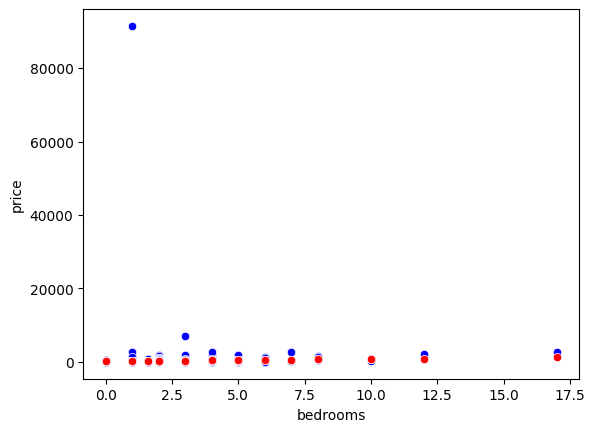

In [ ]:
sns.scatterplot(x = 'bedrooms', y = 'price', color = "blue", data = data1_limpio)
sns.scatterplot(x = 'bedrooms', y = 'Predicciones', color = "red", data = data1_limpio)

In [ ]:
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.00303050437258634

In [ ]:
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.055050017008047694

In [ ]:
# Delete the 'Predicciones2' column from the DataFrame.
data1_limpio = data1_limpio.drop(['Predicciones2','Predicciones3','Predicciones4','Predicciones5','Predicciones1'], axis=1)

0.05647149175245613

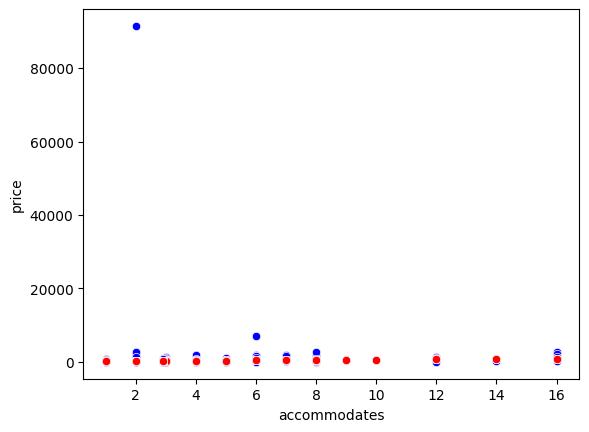

In [ ]:
Vars_Indep = data1_limpio[['accommodates']]
Var_Dep = data1_limpio['price']

model.fit(X = Vars_Indep, y = Var_Dep)

model.__dict__

y_pred = model.predict(X = data1_limpio[['accommodates']])
y_pred

data1_limpio.insert(0, 'Predicciones2', y_pred)
data1_limpio

sns.scatterplot(x = 'accommodates', y = 'price', color = "blue", data = data1_limpio)
sns.scatterplot(x = 'accommodates', y = 'Predicciones2', color = "red", data = data1_limpio)

coef_Deter1 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

coef_Corre2 = np.sqrt(coef_Deter1)
coef_Corre2

0.05676032550325956

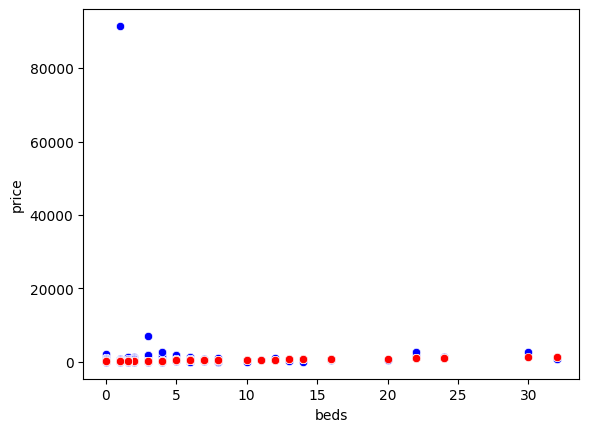

In [ ]:
Vars_Indep = data1_limpio[['beds']]
Var_Dep = data1_limpio['price']

model.fit(X = Vars_Indep, y = Var_Dep)

model.__dict__

y_pred = model.predict(X = data1_limpio[['beds']])
y_pred

data1_limpio.insert(0, 'Predicciones3', y_pred)
data1_limpio

sns.scatterplot(x = 'beds', y = 'price', color = "blue", data = data1_limpio)
sns.scatterplot(x = 'beds', y = 'Predicciones3', color = "red", data = data1_limpio)

coef_Deter2 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter2

coef_Corre3 = np.sqrt(coef_Deter2)
coef_Corre3

0.015337811954419096

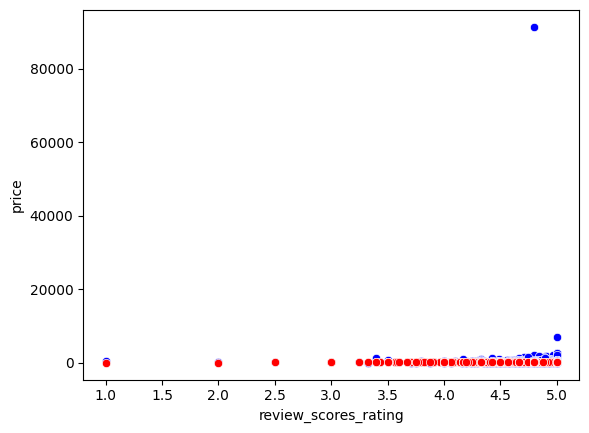

In [ ]:
Vars_Indep = data1_limpio[['review_scores_rating']]
Var_Dep = data1_limpio['price']

model.fit(X = Vars_Indep, y = Var_Dep)

model.__dict__

y_pred = model.predict(X = data1_limpio[['review_scores_rating']])
y_pred

data1_limpio.insert(0, 'Predicciones4', y_pred)
data1_limpio

sns.scatterplot(x = 'review_scores_rating', y = 'price', color = "blue", data = data1_limpio)
sns.scatterplot(x = 'review_scores_rating', y = 'Predicciones4', color = "red", data = data1_limpio)

coef_Deter4 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter4

coef_Corre5 = np.sqrt(coef_Deter4)
coef_Corre5

0.03410294784488439

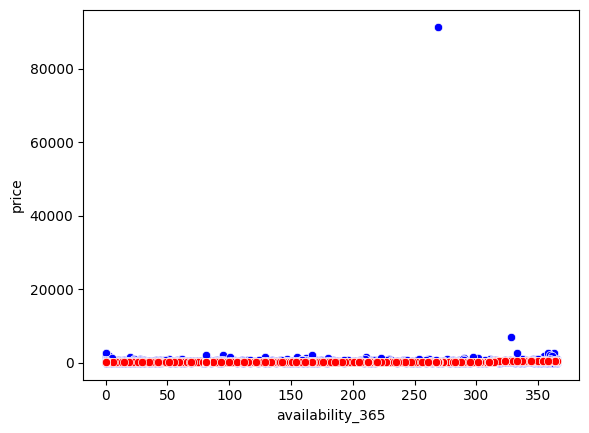

In [ ]:
Vars_Indep = data1_limpio[['availability_365']]
Var_Dep = data1_limpio['price']

model.fit(X = Vars_Indep, y = Var_Dep)

model.__dict__

y_pred = model.predict(X = data1_limpio[['availability_365']])
y_pred

data1_limpio.insert(0, 'Predicciones5', y_pred)
data1_limpio

sns.scatterplot(x = 'availability_365', y = 'price', color = "blue", data = data1_limpio)
sns.scatterplot(x = 'availability_365', y = 'Predicciones5', color = "red", data = data1_limpio)

coef_Deter5 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter5

coef_Corre6 = np.sqrt(coef_Deter5)
coef_Corre6

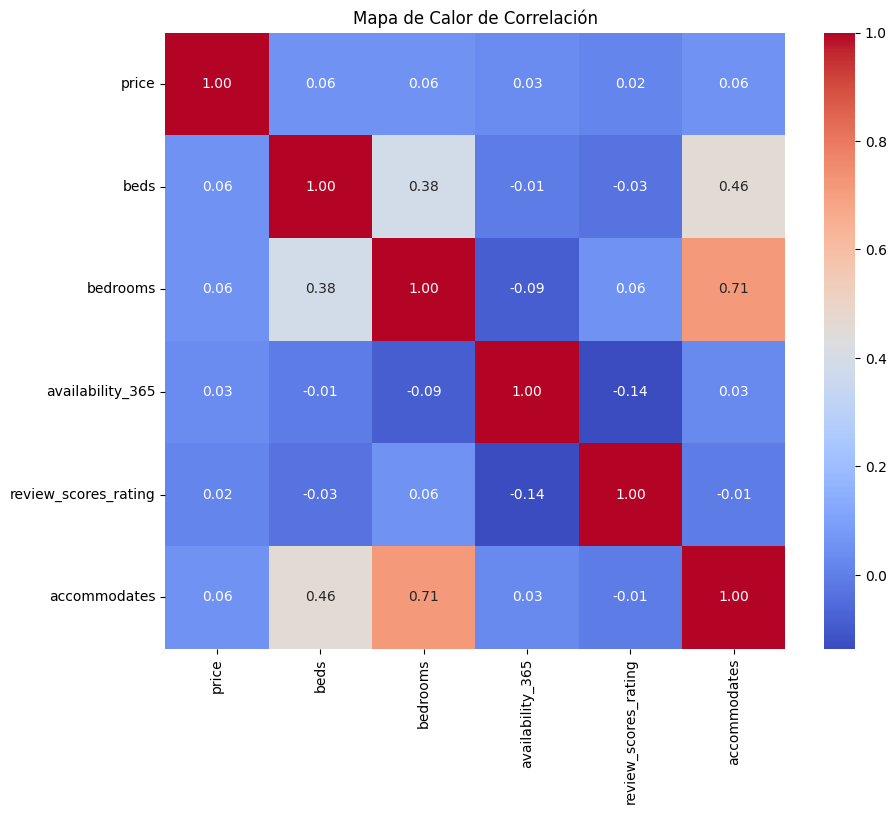

In [ ]:
# Seleccionar las columnas para el mapa de calor
df_heatmap = data1_limpio[['price', 'beds', 'bedrooms', 'availability_365', 'review_scores_rating', 'accommodates']]

# Calcular la matriz de correlación
corr_matrix = df_heatmap.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()